In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib as mplt
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

In [2]:
charactestics = pd.read_csv('caracteristics.csv', low_memory=False)
holidays = pd.read_csv('holidays.csv', low_memory=False)
places = pd.read_csv('places.csv', low_memory=False)
users = pd.read_csv('users.csv',low_memory=False)


In [3]:
rename_columns = {
    #characterstics
    'Num_Acc':'AccidentID',
    'an':'year',
    'mois':'month',
    'jour':'day',
    'hrmn':'hour',
    'lum':'lighting',
    'agg':'city/countryside',
    'int':'intersection',
    'atm':'atmosphericCondition',
    'col':'collisionType',
    'com':'municipality',
    'adr':'address',
    'gps':'gps_coding',
    'lat':'latitude',
    'long':'longitude',
    'dep':'department',
    #places
    'catr':'roadCategory',
    'voie':'roadNumber',
    'v1':'routeNumber',
    'v2':'routeName',
    'circ':'trafficType',
    'nbv':'numberofLanes',
    'pr':'homePRNumber',
    'pr1':'PRDistance',
    'vosp':'reservedLane',
    'prof':'roadProfile',
    'plan':'laneStructure',
    'lartpc':'centralLaneWidth',
    'larrout':'outerLaneWidth',
    'surf':'surfaceCondition',
    'infra':'infrastructure',
    'situ':'situationofAccident',
    'env1':'schoolPoint',
    #users
    'Acc_number':'AccidentID',
    'place':'place',
    'catu':'userCategory',
    'grav':'severity',
    'sexe' : 'sex',
    'trajet':'reasonForTraveling',
    'secu':'safetyEquipment',
    'locp':'locationOfPedestrian',
    'actp':'actionOfPedestrian',
    'etatp':'pedestrianGroup',
    'an_nais':'yearOfBirth',
    'num_veh':'registrationOfVehicle',
}

charactestics.rename(index=str, columns= rename_columns, inplace=True)
holidays.rename(index=str, columns=rename_columns, inplace=True)
places.rename(index=str, columns=rename_columns, inplace=True)
users.rename(index=str, columns=rename_columns, inplace=True)


In [4]:
#func taken from https://www.kaggle.com/kingofknights/accident-data-visualization 
def PlotPiechart(labels, values, columnName):
    fig = {
      "data": [
        {
          "labels": labels,
          "values": values.AccidentID,
          #"domain": {"x": [0, 1]},
          "name": columnName,
          "hoverinfo":"label+percent+name",
          "hole": .6,
          "type": "pie"
        },
         ],
      "layout": {
           # "title":"Percentage of Accident happened in situations : " + columnName,
            "title":Title,
            "annotations": [
                {
                    "font": {
                        "size": 40
                    },
                    "showarrow": False,
                    "text": " ",
                    "x": 5.50,
                    "y": 0.5
                }
            ]
        }
    }
    plt.iplot(fig)

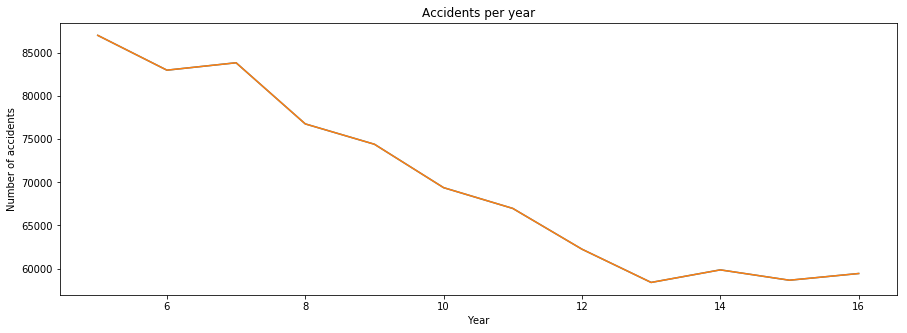

In [5]:
#accidents per year
import matplotlib.pyplot as plt
accid_per_year = charactestics.groupby(['year']).count()
accid_per_year = accid_per_year.iloc[:, 0:2] 

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Accidents per year")
plt.plot(accid_per_year)

plt.show()

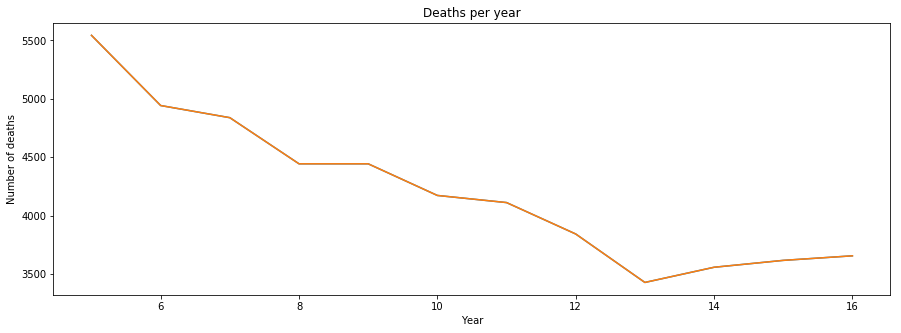

In [6]:
#fatal accidents per year
df = pd.merge(charactestics, users, on="AccidentID")
df = df.loc[:, ['AccidentID','year','severity']]
df = df.loc[df['severity'] == 2]
df = df.groupby(['year']).count()
deaths_per_year = df.iloc[:, 0:2]


plt.figure(figsize=(15,5))
plt.title("Deaths per year")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.plot(deaths_per_year)

plt.show()

Text(0,0.5,'Number of accidents')

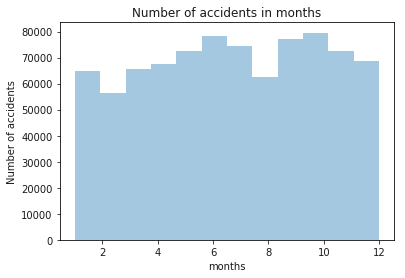

In [7]:
ax = sns.distplot(charactestics.month,bins=12,kde=False);
sns.set(rc={'figure.figsize':(14,10)})
plt.title('Number of accidents in months')
plt.xlabel('months')
plt.ylabel('Number of accidents')


In [8]:
#DEPARMENT with most accidents
import plotly
import plotly.offline as plt

data = charactestics.groupby(by='department', as_index=False).count()
data = data.sort_values(by='AccidentID')

data = [go.Bar(x=data.department, y=data.AccidentID,text=data.AccidentID,
            marker=dict(color='rgb(20,20,20)',line=dict(color=data.AccidentID, width=4),),
            opacity=1
        )]
layout = go.Layout(
    title='Number of accidents by department',
    xaxis= dict( title= 'department'),
    yaxis= dict( title= 'Number of accidents')
)
data = go.Figure(data=data, layout=layout)

plt.iplot(data)


In [9]:
#accidents by road category
data_roadCategory = places.groupby(by='roadCategory', as_index=False).count()
RoadCategoryLabel = {1:'Highway',
                    2:'National Road',
                    3:'Departmental Road',
                    4:'Communal Way',
                    5:'Off public network',
                    6:'Parking lot open to public traffic',
                    9:'other'}

data_roadCategory.roadCategory =  data_roadCategory.roadCategory.map(RoadCategoryLabel)

Title = "Accidents by type of roads (road category) "
PlotPiechart(data_roadCategory.roadCategory.values , data_roadCategory, 'RoadCategory')

In [10]:
data_laneStructure = places.groupby(by='laneStructure', as_index=False).count()
LaneStructureLabel = {
    1:'Straight part',
    2:'Curved on the left',
    3:'Curved right',
    4:'In "S"'
}
data_laneStructure.laneStructure =  data_laneStructure.laneStructure.map(LaneStructureLabel)

Title = "Accidents by lane structure"
PlotPiechart(data_laneStructure.laneStructure.values , data_laneStructure, 'LaneStructure')

In [11]:
data_surface = places.groupby(by='surfaceCondition', as_index=False).count()
SurfaceConditionLable = {
    1 :'normal',
    2 : 'wet',
    3 : 'puddles',
    4 : 'flooded',
    5 : 'snow',
    6 : 'mud',
    7 : 'icy',
    8 : 'fat - oil',
    9 : 'other'
}
data_surface.surfaceCondition =  data_surface.surfaceCondition.map(SurfaceConditionLable)

Title = "Accidents by surface condition"
PlotPiechart(data_surface.surfaceCondition.values , data_surface, 'Surface condition')

In [12]:
data_type = places.groupby(by='trafficType', as_index=False).count()
Trafficlabel = {
    1:'One way',
    2:'Bidirectional',
    3:'Separated carriageways',
    4:'With variable assignment channels'
}

data_type.trafficType =  data_type.trafficType.map(Trafficlabel)

Title = "Accidents by traffic type"
PlotPiechart(data_type.trafficType.values , data_type, 'Traffic type')

In [13]:
data_prof = places.groupby(by='roadProfile', as_index=False).count()
profLable = {
    1:'Dish',
    2:'Slope',
    3:'Hilltop',
    4:'Hill bottom'  
}

data_prof.roadProfile =  data_prof.roadProfile.map(profLable)

Title = "Accidents by road profile"
PlotPiechart(data_prof.roadProfile.values , data_prof, 'Road profile')

In [14]:
data_infra = places.groupby(by='infrastructure', as_index=False).count()
profLable = {
    1:'Underground-tunel',
    2:'Bridge',
    3:'Exchanger or connection brace',
    4:'Railway',
    5:'Carrefour arranged',
    6:'Pedestrian area',
    7:'Toll zone',
    
}

data_infra.infrastructure =  data_infra.infrastructure.map(profLable)

Title = "Accidents by infrastructure"
PlotPiechart(data_infra.infrastructure.values , data_infra, 'Infrastructure')

In [15]:
data_sit = places.groupby(by='situationofAccident', as_index=False).count()
profLable = {
    1:'On the road',
    2:'On emergency stop band',
    3:'n the verge',
    4:'On the sidewalk',
    5:'On bike path',
   
}

data_sit.situationofAccident =  data_sit.situationofAccident.map(profLable)

Title = "situation of Accident"
PlotPiechart(data_sit.situationofAccident.values , data_sit, 'situation of Accident')

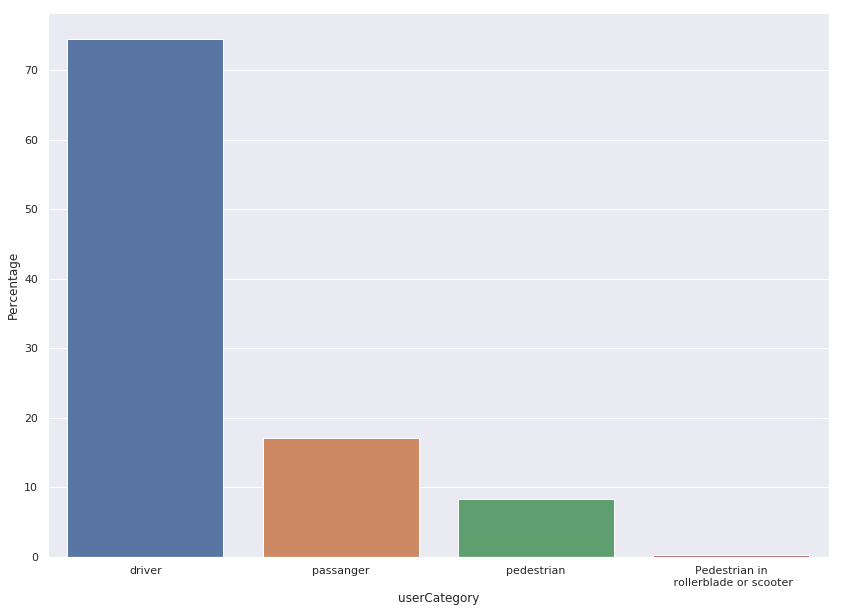

In [16]:
import seaborn as sns

sns.set(style="whitegrid")

data_tmp = users.groupby(by='userCategory', as_index=False).count()


profLable = {
    0:'NULL',
    1:'driver',
    2:'passanger',
    3:'pedestrian',
    4:'Pedestrian in\n rollerblade or scooter',
   
}
data_tmp.userCategory = data_tmp.userCategory.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='userCategory', y='Percentage', data=data_tmp)

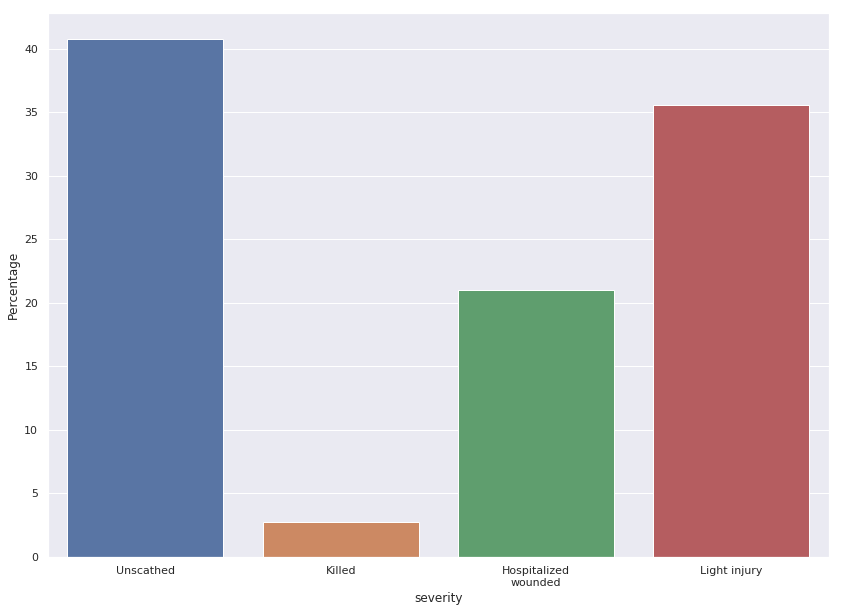

In [17]:
data_tmp = users.groupby(by='severity', as_index=False).count()


profLable = {
    0:'NULL',
    1:'Unscathed',
    2:'Killed',
    3:'Hospitalized\nwounded',
    4:'Light injury',
   
}
data_tmp.severity = data_tmp.severity.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='severity', y='Percentage', data=data_tmp)

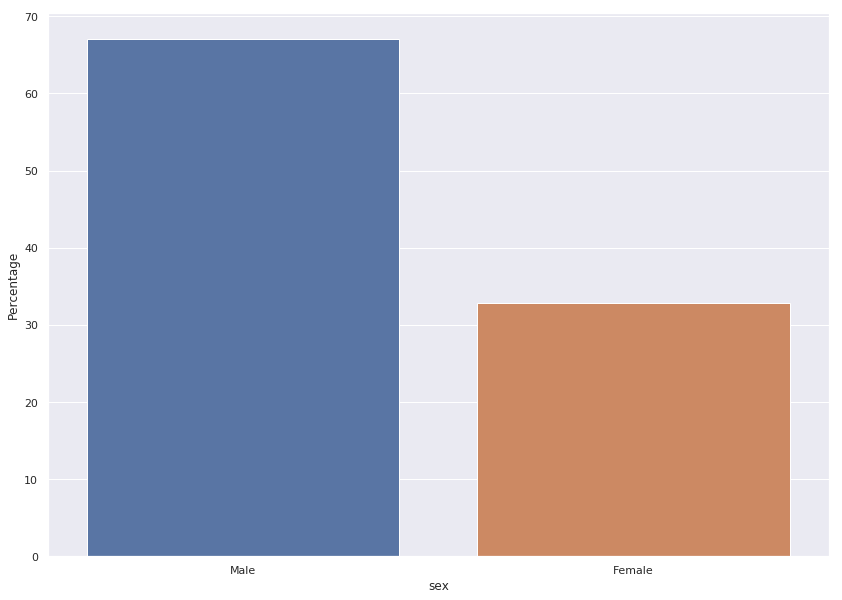

In [18]:
data_tmp = users.groupby(by='sex', as_index=False).count()


profLable = {
    0:'NULL',
    1:'Male',
    2:'Female',   
}
data_tmp.sex = data_tmp.sex.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='sex', y='Percentage', data=data_tmp)

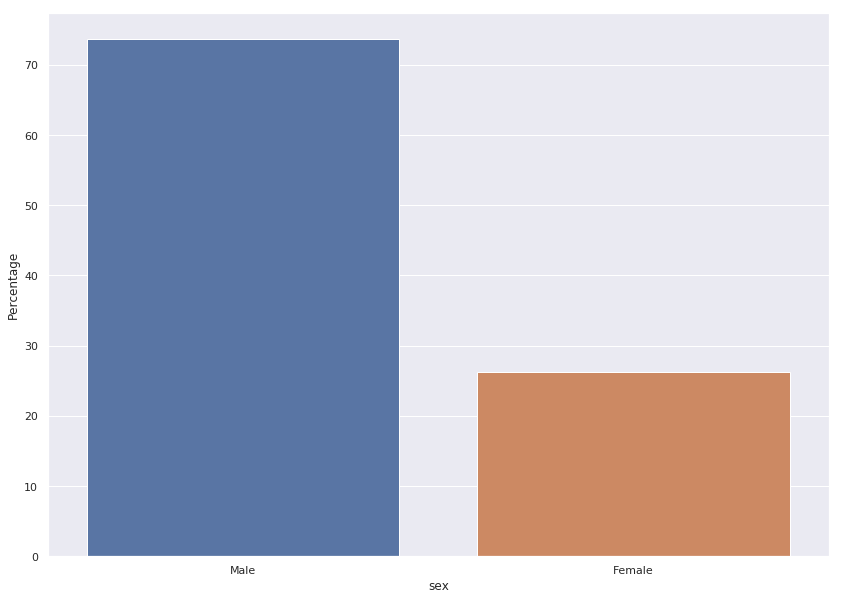

In [19]:
#accidents by driver sex
data_tmp = users.loc[(users["userCategory"]==1)]
data_tmp = data_tmp.groupby(by='sex', as_index=False).count()


profLable = {
    0:'NULL',
    1:'Male',
    2:'Female',   
}
data_tmp.sex = data_tmp.sex.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users.loc[(users["userCategory"]==1)]) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='sex', y='Percentage', data=data_tmp)


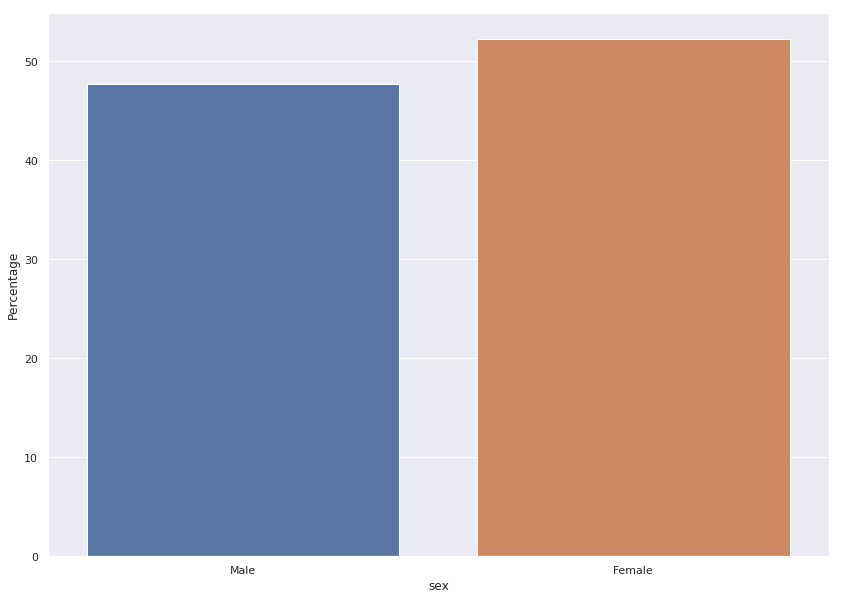

In [20]:
#users by sex that are not drivers
data_tmp = users.loc[(users["userCategory"]!=1)]
data_tmp = data_tmp.groupby(by='sex', as_index=False).count()


profLable = {
    0:'NULL',
    1:'Male',
    2:'Female',   
}
data_tmp.sex = data_tmp.sex.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users.loc[(users["userCategory"]!=1)]) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='sex', y='Percentage', data=data_tmp)

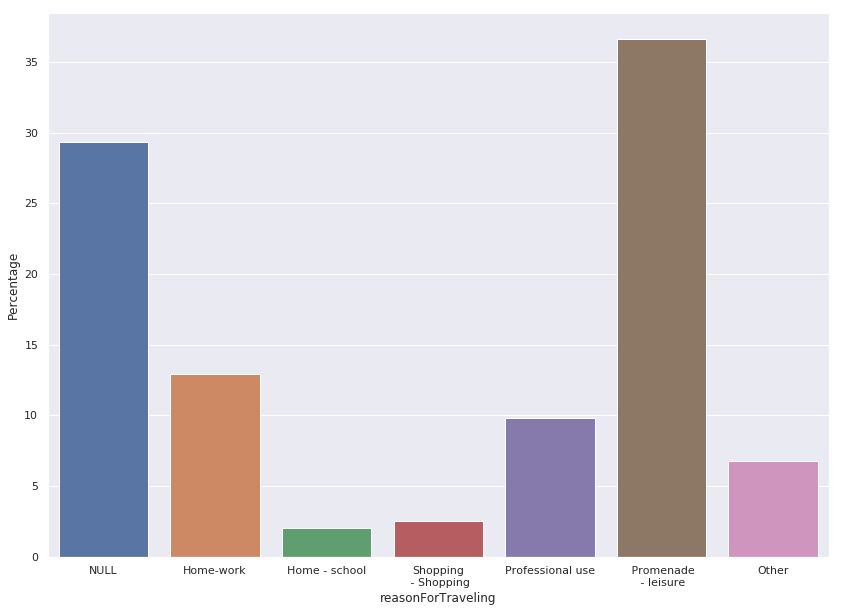

In [21]:
data_tmp = users.groupby(by="reasonForTraveling", as_index=False).count()


profLable = {
    0:'NULL',
    1:'Home-work',
    2:'Home - school', 
    3:'Shopping\n - Shopping',
    4:'Professional use',
    5:' Promenade\n - leisure',
    9:'Other',
    
}
data_tmp.reasonForTraveling = data_tmp.reasonForTraveling.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='reasonForTraveling', y='Percentage', data=data_tmp)

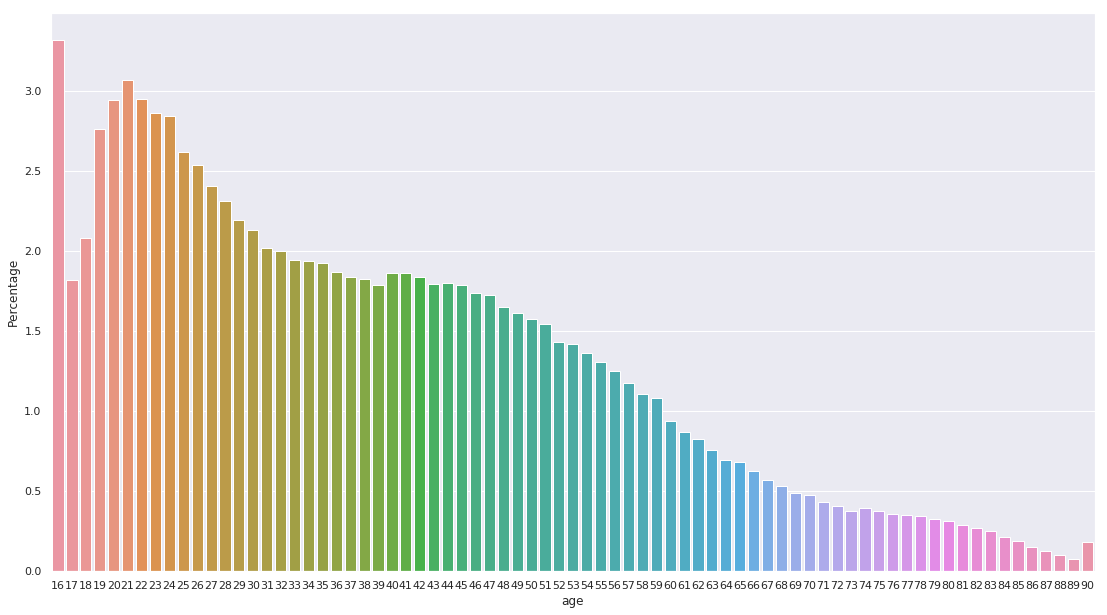

In [22]:
#accidents by age of driver
#everyone below 16 and above 90 put together
data_tmp = users
data_tmp = data_tmp.loc[data_tmp["userCategory"] == 1]
data_tmp = pd.merge(charactestics, data_tmp, on = "AccidentID")



data_tmp["year"] = data_tmp["year"]+2000
data_tmp["age"]=data_tmp["year"]- data_tmp["yearOfBirth"]
data_tmp=data_tmp.dropna(axis='rows')

data_tmp["age"] = data_tmp["age"].apply(lambda x: 16 if (x<17) else x)
data_tmp["age"] = data_tmp["age"].apply(lambda x: 90 if (x>89) else x)

data_tmp2 = data_tmp
data_tmp["age"] = data_tmp["age"].astype(int)

data_tmp = data_tmp.groupby(by='age', as_index=False).count()

data_tmp.AccidentID = data_tmp.AccidentID/len(data_tmp2) * 100

data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})


sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.barplot(x='age', y='Percentage', data=data_tmp)




In [23]:
data_tmp = users
data_tmp = data_tmp.loc[(data_tmp["userCategory"]==3) | (data_tmp["userCategory"]==4)]
print float(len(data_tmp))/len(users) #8%
data_tmp = data_tmp.loc[(data_tmp["severity"] == 2) | (data_tmp["severity"] == 3)]
print float(len(data_tmp))/len(users.loc[(users["severity"] == 2) | (users["severity"] == 3)]) 
#pedestrians get more serious injuries

0.0847097955496
0.147540393195


In [24]:
data_tmp = users
data_tmp = data_tmp.loc[(data_tmp["userCategory"]==2)]
print float(len(data_tmp))/len(users) #
data_tmp = data_tmp.loc[(data_tmp["severity"] == 2) | (data_tmp["severity"] == 3)]
print float(len(data_tmp))/len(users.loc[(users["severity"] == 2) | (users["severity"] == 3)]) 

0.170249013196
0.187433878512


In [25]:
data_tmp = users
data_tmp = data_tmp.loc[(data_tmp["userCategory"]==1)]
print float(len(data_tmp))/len(users) 
data_tmp = data_tmp.loc[(data_tmp["severity"] == 2) | (data_tmp["severity"] == 3)]
print float(len(data_tmp))/len(users.loc[(users["severity"] == 2) | (users["severity"] == 3)]) 


0.745041191255
0.665025728293


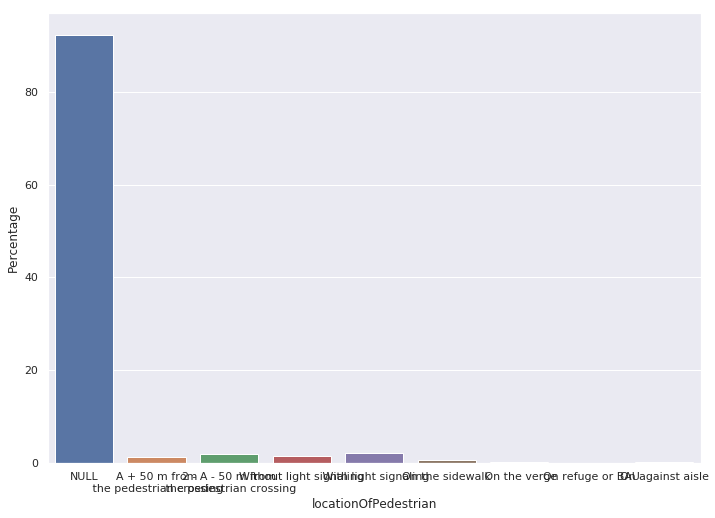

In [26]:
data_tmp = users.groupby(by="locationOfPedestrian", as_index=False).count()


profLable = {
    0:'NULL',
    1:'A + 50 m from\n the pedestrian crossing',
    2:'2 - A - 50 m from\n the pedestrian crossing',
    3:'Without light signaling', 
    4:' With light signaling',
    5:'On the sidewalk',
    6:' On the verge',
    7:'On refuge or BAU',
    8:'On against aisle'
    
}
data_tmp.locationOfPedestrian = data_tmp.locationOfPedestrian.map(profLable)
data_tmp.AccidentID = data_tmp.AccidentID/len(users) * 100
data_tmp = data_tmp.rename(index=str, columns={"AccidentID": "Percentage"})
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="locationOfPedestrian", y='Percentage', data=data_tmp)